<a href="https://colab.research.google.com/github/akshayyala/EDA/blob/main/Indian_Food_101_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Load and preview dataset
import pandas as pd
df = pd.read_csv('/content/indian_food.csv')  # Replace with your file path

# Preview data
print(df.head())
print(df.info())
print(df.describe(include='all'))  # Summary for all columns, including categorical


             name                                        ingredients  \
0      Balu shahi                    Maida flour, yogurt, oil, sugar   
1          Boondi                            Gram flour, ghee, sugar   
2  Gajar ka halwa       Carrots, milk, sugar, ghee, cashews, raisins   
3          Ghevar  Flour, ghee, kewra, milk, clarified butter, su...   
4     Gulab jamun  Milk powder, plain flour, baking powder, ghee,...   

         diet  prep_time  cook_time flavor_profile   course        state  \
0  vegetarian         45         25          sweet  dessert  West Bengal   
1  vegetarian         80         30          sweet  dessert    Rajasthan   
2  vegetarian         15         60          sweet  dessert       Punjab   
3  vegetarian         15         30          sweet  dessert    Rajasthan   
4  vegetarian         15         40          sweet  dessert  West Bengal   

  region  
0   East  
1   West  
2  North  
3   West  
4   East  
<class 'pandas.core.frame.DataFrame'>
RangeI

In [4]:
print(df.isnull().sum())


name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64


In [5]:
print(df.duplicated().sum())


0


In [6]:
print(df.dtypes)


name              object
ingredients       object
diet              object
prep_time          int64
cook_time          int64
flavor_profile    object
course            object
state             object
region            object
dtype: object


In [7]:
df.head(10)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
5,Imarti,"Sugar syrup, lentil flour",vegetarian,10,50,sweet,dessert,West Bengal,East
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,-1,-1
8,Kalakand,"Milk, cottage cheese, sugar",vegetarian,20,30,sweet,dessert,West Bengal,East
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,-1,-1


In [9]:
#Cleaning the dataset as there are , few incorrect values
# Step 1: Define a custom validation function
def is_valid_entry(value):
    if isinstance(value, (int, float)):
        return value >= 0  # Non-negative numeric values
    elif isinstance(value, str):
        return bool(value.strip()) and value not in ["-1"]  # Non-empty valid strings
    else:
        return False  # Invalid for other types

# Step 2: Apply validation across the entire DataFrame
valid_data = df.applymap(is_valid_entry)

# Step 3: Drop rows with any invalid entries
df_cleaned = df[valid_data.all(axis=1)].reset_index(drop=True)

# Step 4: Verify the cleaned dataset
print("Cleaned Dataset:")
print(df_cleaned.info())


Cleaned Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            180 non-null    object
 1   ingredients     180 non-null    object
 2   diet            180 non-null    object
 3   prep_time       180 non-null    int64 
 4   cook_time       180 non-null    int64 
 5   flavor_profile  180 non-null    object
 6   course          180 non-null    object
 7   state           180 non-null    object
 8   region          180 non-null    object
dtypes: int64(2), object(7)
memory usage: 12.8+ KB
None


<ipython-input-9-7bc07554d194>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  valid_data = df.applymap(is_valid_entry)


In [10]:
#Replace Invalid Values: Replaces predefined invalid values (-1, "-1", "") with NaN.
#1. Drop Rows with NaN: Removes rows with NaN values in any column.
#2. Custom Validation: The is_valid_entry function dynamically validates each entry based on numeric and string criteria.
#3. Apply Validation: Use applymap to apply the validation to every cell in the DataFrame

In [13]:
df_cleaned.head(10)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
5,Imarti,"Sugar syrup, lentil flour",vegetarian,10,50,sweet,dessert,West Bengal,East
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
7,Kalakand,"Milk, cottage cheese, sugar",vegetarian,20,30,sweet,dessert,West Bengal,East
8,Lassi,"Yogurt, milk, nuts, sugar",vegetarian,5,5,sweet,dessert,Punjab,North
9,Petha,"Firm white pumpkin, sugar, kitchen lime, alum ...",vegetarian,10,30,sweet,dessert,Uttar Pradesh,North


In [12]:
# Identify and log dropped rows
dropped_rows = df[~df.index.isin(df_cleaned.index)]
print("Dropped rows:")
print(dropped_rows)


Dropped rows:
            name                                        ingredients  \
180     Dalithoy  Arhar dal, coconut oil, curry leaves, mustard ...   
181       Dhokla         Rava, coconut, gram flour, mustard, sesame   
182  Dudhi halwa  Bottle gourd, green, raisins, sugar, clarified...   
183  Gatta curry  Yogurt, besan, sauce, garam masala powder, gra...   
184    Gud papdi  Wheat flour, jaggery, clarified butter, sliced...   
..           ...                                                ...   
250    Til Pitha            Glutinous rice, black sesame seeds, gur   
251      Bebinca  Coconut milk, egg yolks, clarified butter, all...   
252       Shufta  Cottage cheese, dry dates, dried rose petals, ...   
253    Mawa Bati  Milk powder, dry fruits, arrowroot powder, all...   
254       Pinaca  Brown rice, fennel seeds, grated coconut, blac...   

           diet  prep_time  cook_time flavor_profile       course  \
180  vegetarian          5         20             -1  main cours

In [14]:
# Display the first few rows of the cleaned DataFrame
print("Updated DataFrame (after cleaning):")
print(df_cleaned.head(10))


Updated DataFrame (after cleaning):
             name                                        ingredients  \
0      Balu shahi                    Maida flour, yogurt, oil, sugar   
1          Boondi                            Gram flour, ghee, sugar   
2  Gajar ka halwa       Carrots, milk, sugar, ghee, cashews, raisins   
3          Ghevar  Flour, ghee, kewra, milk, clarified butter, su...   
4     Gulab jamun  Milk powder, plain flour, baking powder, ghee,...   
5          Imarti                          Sugar syrup, lentil flour   
6          Jalebi  Maida, corn flour, baking soda, vinegar, curd,...   
7        Kalakand                        Milk, cottage cheese, sugar   
8           Lassi                          Yogurt, milk, nuts, sugar   
9           Petha  Firm white pumpkin, sugar, kitchen lime, alum ...   

         diet  prep_time  cook_time flavor_profile   course          state  \
0  vegetarian         45         25          sweet  dessert    West Bengal   
1  vegetarian  

In [15]:
# Debugging - print the shape to see if data is lost
print("Shape before cleaning:", df.shape)
print("Shape after cleaning:", df_cleaned.shape)


Shape before cleaning: (255, 9)
Shape after cleaning: (180, 9)


In [16]:
# Convert to a list and print
attribute_list = df_cleaned.columns.tolist()
print("Attributes as List:")
print(attribute_list)



Attributes as List:
['name', 'ingredients', 'diet', 'prep_time', 'cook_time', 'flavor_profile', 'course', 'state', 'region']


In [17]:
print(df_cleaned.dtypes)

name              object
ingredients       object
diet              object
prep_time          int64
cook_time          int64
flavor_profile    object
course            object
state             object
region            object
dtype: object


In [18]:
# Basic overview of the data
print(df_cleaned.info())  # Data types and non-null counts
print(df_cleaned.describe())  # Summary statistics for numerical columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            180 non-null    object
 1   ingredients     180 non-null    object
 2   diet            180 non-null    object
 3   prep_time       180 non-null    int64 
 4   cook_time       180 non-null    int64 
 5   flavor_profile  180 non-null    object
 6   course          180 non-null    object
 7   state           180 non-null    object
 8   region          180 non-null    object
dtypes: int64(2), object(7)
memory usage: 12.8+ KB
None
        prep_time   cook_time
count  180.000000  180.000000
mean    30.705556   40.366667
std     64.158036   54.377215
min      5.000000    5.000000
25%     10.000000   25.000000
50%     10.000000   30.000000
75%     20.000000   45.000000
max    500.000000  720.000000


In [19]:
# Unique counts of categorical columns
print("\nUnique values in 'diet':")
print(df_cleaned['diet'].value_counts())

print("\nUnique values in 'flavor_profile':")
print(df_cleaned['flavor_profile'].value_counts())

print("\nUnique values in 'course':")
print(df_cleaned['course'].value_counts())

print("\nUnique values in 'state':")
print(df_cleaned['state'].value_counts())

print("\nUnique values in 'region':")
print(df_cleaned['region'].value_counts())



Unique values in 'diet':
diet
vegetarian        163
non vegetarian     17
Name: count, dtype: int64

Unique values in 'flavor_profile':
flavor_profile
spicy     102
sweet      73
bitter      4
sour        1
Name: count, dtype: int64

Unique values in 'course':
course
main course    83
dessert        70
snack          25
starter         2
Name: count, dtype: int64

Unique values in 'state':
state
Punjab             30
Gujarat            29
Maharashtra        23
West Bengal        20
Tamil Nadu         13
Andhra Pradesh     10
Uttar Pradesh       8
Assam               8
Rajasthan           6
Karnataka           5
Telangana           5
Odisha              5
Kerala              4
Bihar               3
Madhya Pradesh      2
Goa                 2
Uttarakhand         1
Manipur             1
Nagaland            1
NCT of Delhi        1
Jammu & Kashmir     1
Chhattisgarh        1
Haryana             1
Name: count, dtype: int64

Unique values in 'region':
region
West          60
North         45

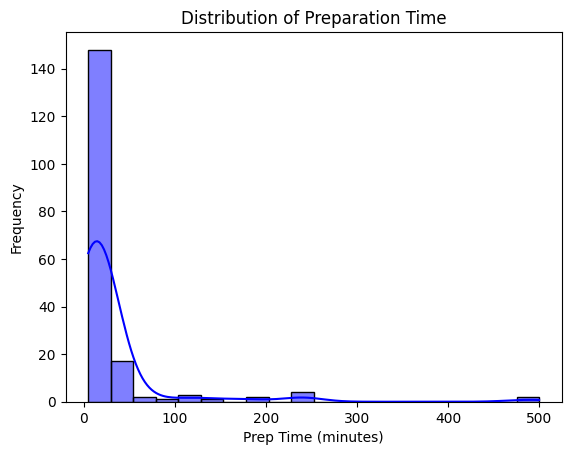

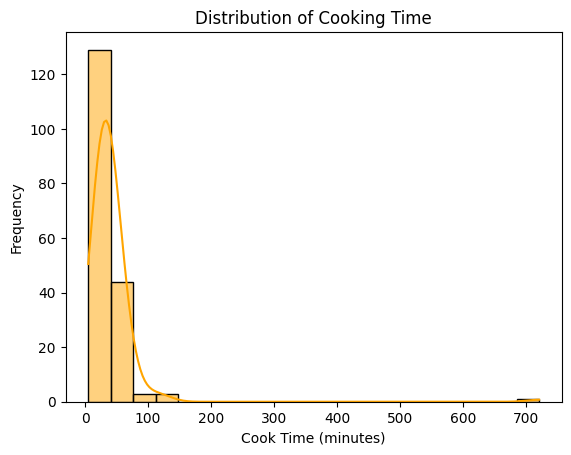

In [21]:
# Plot distribution of preparation time
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df_cleaned['prep_time'], kde=True, color="blue", bins=20)
plt.title("Distribution of Preparation Time")
plt.xlabel("Prep Time (minutes)")
plt.ylabel("Frequency")
plt.show()

# Plot distribution of cooking time
sns.histplot(df_cleaned['cook_time'], kde=True, color="orange", bins=20)
plt.title("Distribution of Cooking Time")
plt.xlabel("Cook Time (minutes)")
plt.ylabel("Frequency")
plt.show()


<ipython-input-22-a465580516c4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diet', data=df_cleaned, palette="viridis")


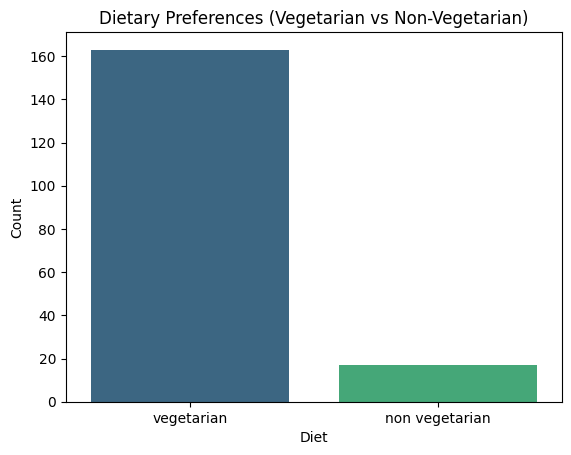

In [22]:
sns.countplot(x='diet', data=df_cleaned, palette="viridis")
plt.title("Dietary Preferences (Vegetarian vs Non-Vegetarian)")
plt.xlabel("Diet")
plt.ylabel("Count")
plt.show()


<ipython-input-23-df0636136881>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diet', data=df_cleaned, palette="viridis")


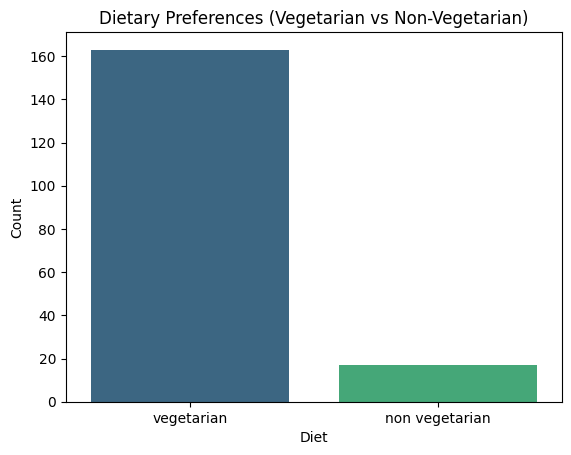

In [23]:
##Analyze Categorical Data with Bar Charts


sns.countplot(x='diet', data=df_cleaned, palette="viridis")
plt.title("Dietary Preferences (Vegetarian vs Non-Vegetarian)")
plt.xlabel("Diet")
plt.ylabel("Count")
plt.show()


<ipython-input-24-4ca453b6618a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='course', data=df_cleaned, palette="pastel")


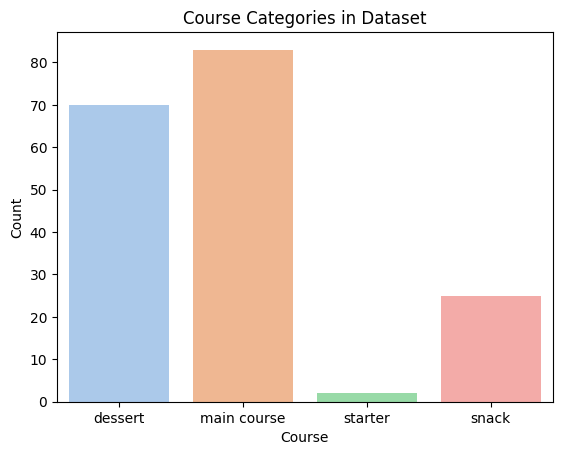

In [24]:
#Course Categories
sns.countplot(x='course', data=df_cleaned, palette="pastel")
plt.title("Course Categories in Dataset")
plt.xlabel("Course")
plt.ylabel("Count")
plt.show()


<ipython-input-43-cde2cab77619>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='state', data=df_cleaned, palette="Set2")


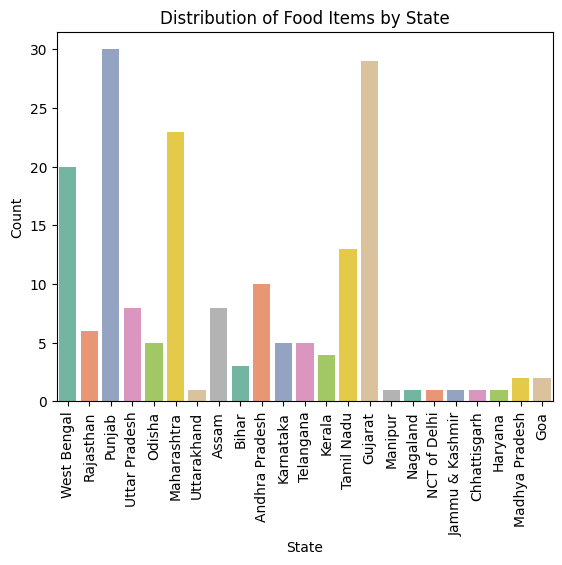

<ipython-input-43-cde2cab77619>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=df_cleaned, palette="Set3")


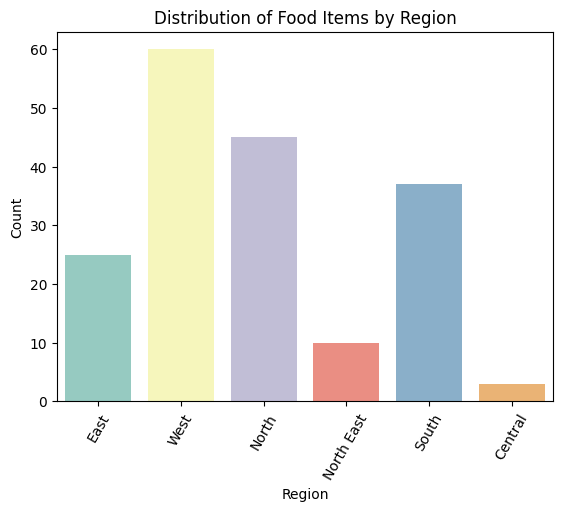

In [43]:
#Analyze State & Region Data

#ByState
sns.countplot(x='state', data=df_cleaned, palette="Set2")
plt.title("Distribution of Food Items by State")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

#ByRegion
sns.countplot(x='region', data=df_cleaned, palette="Set3")
plt.title("Distribution of Food Items by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=60)
plt.show()


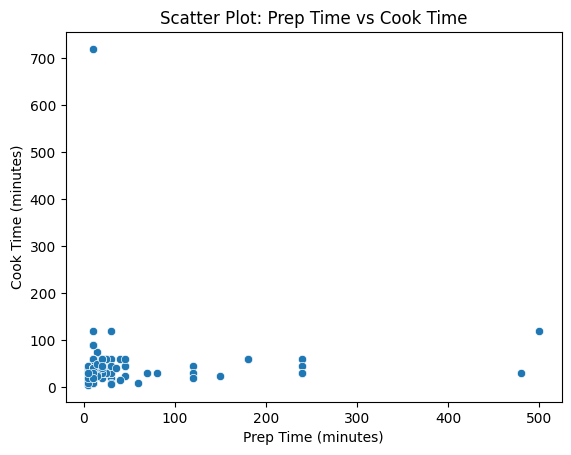

In [29]:
#Relationships Between Features

#Prep Time vs Cook Time
sns.scatterplot(x='prep_time', y='cook_time', data=df_cleaned)
plt.title("Scatter Plot: Prep Time vs Cook Time")
plt.xlabel("Prep Time (minutes)")
plt.ylabel("Cook Time (minutes)")
plt.show()


<ipython-input-35-5478f0afea6e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Ingredient', data=ingredient_df.head(top_n), palette="Blues_r")


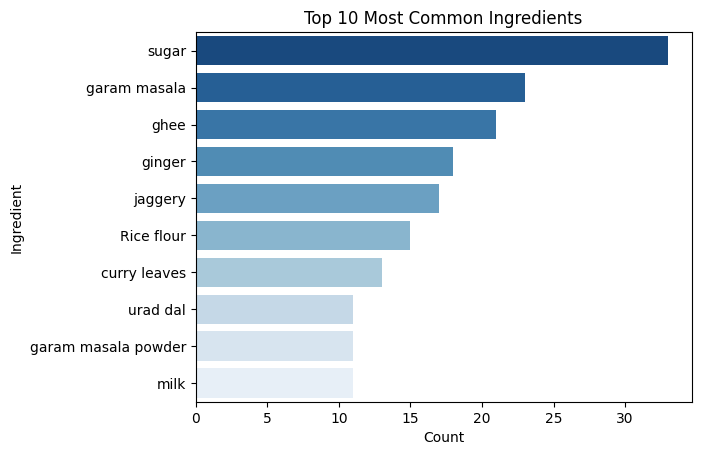

In [35]:
#Ingredient Analysis

from collections import Counter

# Combine all ingredients into a single list
all_ingredients = df_cleaned['ingredients'].dropna().str.split(', ').sum()

# Count the occurrences of ingredients
ingredient_counts = Counter(all_ingredients)

# Convert to DataFrame and sort
ingredient_df = pd.DataFrame(ingredient_counts.items(), columns=['Ingredient', 'Count']).sort_values(by='Count', ascending=False)

# Visualize top N ingredients
top_n = 10
sns.barplot(x='Count', y='Ingredient', data=ingredient_df.head(top_n), palette="Blues_r")
plt.title(f"Top {top_n} Most Common Ingredients")
plt.xlabel("Count")
plt.ylabel("Ingredient")
plt.show()


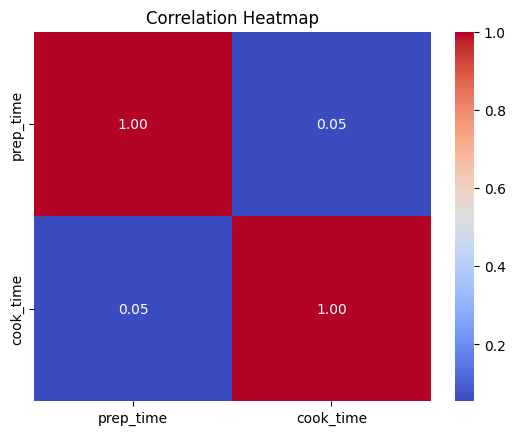

In [40]:

# Correlation heatmap
correlation_matrix = df_cleaned[['prep_time', 'cook_time']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
